# WORLD HAPPINESS


The goal of this analyzis is to understand how happy I am when I'm a Lithuanian and which criteria influence happiness equal the most

# DATA DESCRIPTION

Data file 'World_Happiness_Report_2022.csv' contains information of 146 countries and the criteria by which it was assessed countries happiness rank

In [264]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
import random
from scipy import stats

In [115]:
df = pd.read_csv('World_Happiness_Report_2022.csv')
df.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [116]:
df = df.rename(columns={'Explained by: Social support': 'Social support', 
                        'Explained by: GDP per capita': 'GDP per capita', 
                        'Explained by: Healthy life expectancy' : 'Healthy life expectancy', 
                        'Explained by: Freedom to make life choices' : 'Freedom to make life choices' ,
                        'Explained by: Generosity' : 'Generosity' , 
                        'Explained by: Perceptions of corruption' : 'Perceptions of corruption'  })

In [117]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [12]:
len(df)

146

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RANK                          146 non-null    int64  
 1   Country                       146 non-null    object 
 2   Happiness score               146 non-null    float64
 3   Whisker-high                  146 non-null    float64
 4   Whisker-low                   146 non-null    float64
 5   Dystopia (1.83) + residual    146 non-null    float64
 6   GDP per capita                146 non-null    float64
 7   Social support                146 non-null    float64
 8   Healthy life expectancy       146 non-null    float64
 9   Freedom to make life choices  146 non-null    float64
 10  Generosity                    146 non-null    float64
 11  Perceptions of corruption     146 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.8+ KB


In [190]:
df.describe().round(2)

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,73.50,5.55,5.67,5.43,1.83,1.41,0.91,0.59,0.52,0.15,0.15
std,42.29,1.09,1.07,1.11,0.53,0.42,0.28,0.18,0.15,0.08,0.13
min,1.00,2.40,2.47,2.34,0.19,0.00,0.00,0.00,0.00,0.00,0.00
25%,37.25,4.89,5.01,4.75,1.56,1.10,0.73,0.46,0.44,0.09,0.07
50%,73.50,5.57,5.68,5.45,1.89,1.45,0.96,0.62,0.54,0.13,0.12
75%,109.75,6.30,6.45,6.19,2.15,1.78,1.11,0.72,0.63,0.20,0.20
max,146.00,7.82,7.89,7.76,2.84,2.21,1.32,0.94,0.74,0.47,0.59


In [366]:
df['Country']= df['Country'].replace('*', '')

In [367]:
df[df['Country'] == 'Luxembourg']

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Happiness index
5,6,Luxembourg,7.404,7.501,7.307,2.042,2.209,1.155,0.79,0.7,0.12,0.388,EU,3


# CLASSIFYING

Happiness index variables into: 0 - Unhappy 1 - A little happy 2 - Happy 3 - Very happy 4 - In euphoria

In [133]:
def happiness_index(num):
    if num > 8 :
        return '4'
    elif num > 6 :
        return '3'
    elif num > 4 :
        return '2'
    elif num > 2 :
        return '1'
    else:
        return '0'

In [134]:
df['Happiness index'] = df['Happiness score'].map(happiness_index)

In [368]:
df[df['Country'] == 'Lithuania']

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Happiness index
33,34,Lithuania,6.446,6.535,6.356,2.153,1.804,1.204,0.659,0.496,0.053,0.077,EU,3


Sort by continent

In [100]:
pip install pycountry-convert

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
Note: you may need to restart the kernel to use updated packages.
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=e6b6ac33a3a9e39be396422b2c7e0891ddf970afea66f3a3be2b0985cc0e6ff4
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [338]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return ( cn_continent)

In [339]:
df['Continent'] = df['Country'].map(get_continent)

# VISUALIZING DATA

In [322]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [341]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [342]:
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['Happiness score'],
            text=df['Country'],
            colorbar={'title': 'Happiness'},
            colorscale=[[0, 'rgb(31,125,180)'],
                        [0.1, 'rgb(51,160,44)'],
                        [0.50, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
            reversescale = False)

In [343]:
layout = dict(title='World Happiness Rankings 2022',
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

TOP 3 continents by average of 'Happiness score'

In [382]:
df.groupby(df['Continent'])['Happiness score'].mean().sort_values(ascending=False)[0:3]

Continent
OC    7.181000
EU    6.469821
NA    6.288818
Name: Happiness score, dtype: float64

Criteria according to which Lithuania lags behind the country with the highest rating

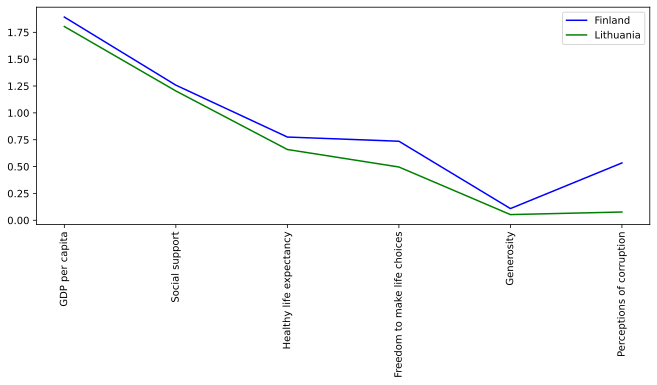

In [385]:
LT_compare = df[df['Country'].isin(["Lithuania","Finland"])]
LT_compare.iloc[0,6:12].plot(color = 'b', figsize = (11,4))
LT_compare.iloc[1,6:12].plot(color = 'g', figsize = (11,4))
plt.xticks(rotation=90)
labels=['Finland', 'Lithuania']
plt.legend(labels)
plt.show()

It shows that Lithuania lagging behind the most of 'Freedom to make life choices' and 'Perceptions of coruption'

# Multicollinearity check

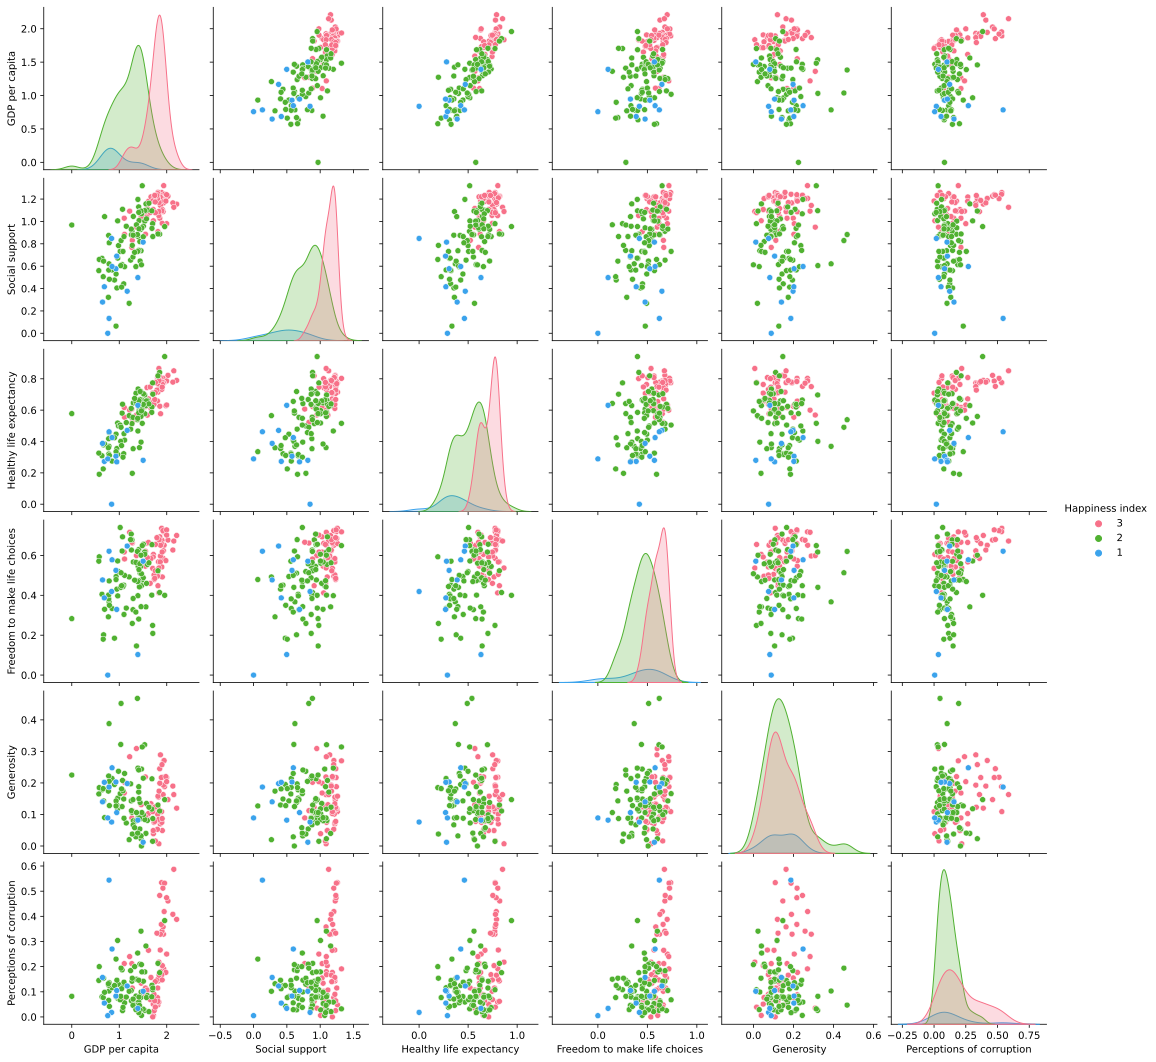

In [359]:
sns.pairplot(df,  hue='Happiness index' , palette='husl',  vars=['GDP per capita',
        'Social support',
        'Healthy life expectancy',
        'Freedom to make life choices',
        'Generosity', 
        'Perceptions of corruption'])

It shows that 'Generosity' and 'Perceptions of coruption' criteria has hop distributions between all happiness indexes and therefore I can assume that they are at least make influence

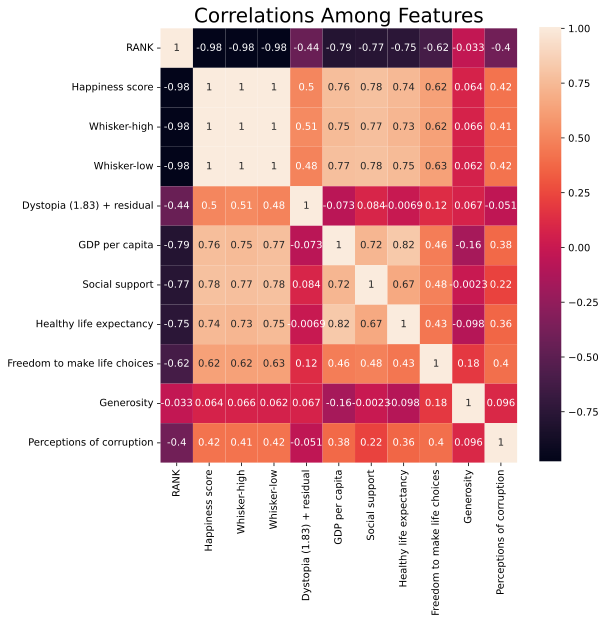

In [360]:
plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlations Among Features", fontsize = 20);

It shows that countries with higher GDP ,their people has higher healthy life expectancy and social support

Relationship Between GDP and healthy life expectancy

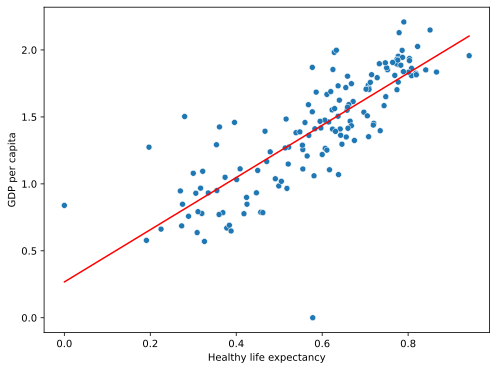

In [386]:
x=df['Healthy life expectancy']
y=df['GDP per capita']
parameter = np.polyfit(x,y,1) 
y2 = parameter[0] * x + parameter[1] 
plt.figure(figsize=(8,6))
sns.scatterplot(x=x,y=y)
plt.plot(x, y2, color='r') 
plt.show()

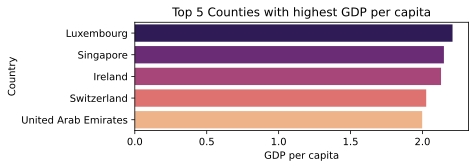

In [437]:
plt.subplots(figsize = (6,2))
sns.barplot(y='Country', x='GDP per capita' , data=df.nlargest(5, 'GDP per capita'), palette='magma')
plt.xticks()
plt.xlabel('GDP per capita')
plt.ylabel('Country')
plt.title('Top 5 Counties with highest GDP per capita')
plt.show()

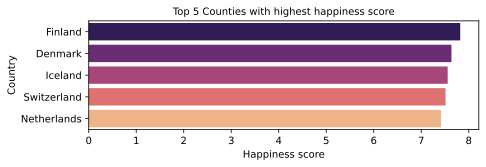

In [392]:
plt.subplots(figsize = (7,2))
sns.barplot(x ='Happiness score', y = 'Country', data=df.nlargest(5, 'Happiness score'), palette='magma')
plt.xticks()
plt.ylabel("Country")
plt.xlabel("Happiness score")
plt.title("Top 5 Counties with highest happiness score", fontsize = 10)
plt.show()

It shows that GDP per capita is not the most significant criterion

# Forecasting

In [404]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Continent', 'Happiness index'],
      dtype='object')

In [405]:
y = df['Happiness score']
x = df[['GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 
        'Generosity','Perceptions of corruption']]

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [407]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [408]:
len(x_train)

116

In [409]:
lm = LinearRegression()

In [410]:
lm.fit(x_train, y_train)

LinearRegression()

In [411]:
lm.intercept_

1.5774156616362833

In [412]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficients'])
coeff_df.round(2)

,Coefficients
GDP per capita,0.72
Social support,1.56
Healthy life expectancy,0.83
Freedom to make life choices,1.55
Generosity,1.39
Perceptions of corruption,0.38


It shows that the most significant criteria is 'Social support' and 'Freedom to make life choices'

In [413]:
predictions = lm.predict(x_test)

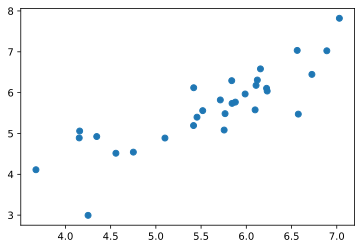

In [414]:
plt.scatter(x=predictions, y=y_test)

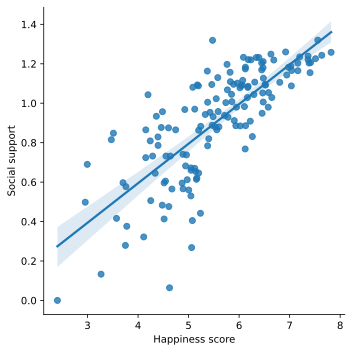

In [417]:
sns.lmplot(x='Happiness score', y='Social support', data=df)

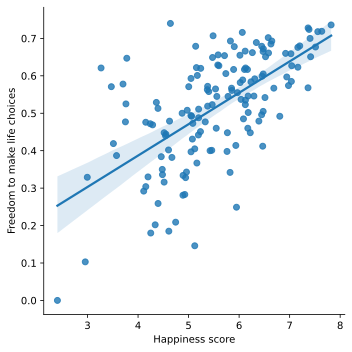

In [438]:
sns.lmplot(x='Happiness score', y='Freedom to make life choices', data=df)